### Závěrečný projekt - modul Python

V tomto projektu budete analyzovat data ze stránky `www.sreality.cz`. Budete tedy získávat aktuální nabídku bytů ve Zlíně.
Projekt se dělí na 2 části:
1. WebScraping - pomocí knihovny `BeautifulSoup` získejte všechny aktuální inzerce bytů v daném městě. 
- Získáte **tyto** informace: `URL odkaz bytu, rozměry bytu, kompozice bytu, cena bytu, lokace bytu (Ulice+město)`
2. Datová analýza - ETL proces
- V první fázi prověďte processing dat tak, aby obsahovala příslušné datové typy, nenulové hodnoty atp. Ulice i město bude v samostatných sloupcích.
- Zprocesovaná a vyčištěná data vyexportujte do `.csv` souboru s názvem `{vašeJméno}_zdrojová_data.csv`
3. Datová analýza - analýza dat
- Třetí část začněte tak, že si do dataframe nahrajete vámi vyexportovaný `.csv` soubor s vyscrapovanými daty.
- Ve druhé fázi proveďte analýzu dat a odpovězte na tyto dotazy:
- `Jaká je průměrná cena bytů?`
- `Jaká je průměrná cena bytů pro každou kompozici (1+1, 2+1, atp.)? Zobrazte i na grafu.`
- `Jaká je průměrná velikost bytu pro každou kompozici?`
- `Existuje ulice, kde je vyšší koncentrace dražších bytů?`
- `Jaký typ kompozice je v daném městě nejčastěji inzerovan? Který to je? Proč myslíte, že tomu tak je?`
- `Existují zde inzerce bytů, které stojí více, než 20.000,-? Pokud ano, jsou v této cenové hladině inzerovány i maximálně dvoupokojové byty (2+1/2+kk)?`
- `Zjištěte minimální a maximální inzerce pro každou kompozici bytu. Která kompozice má největší rozptyl mezi minimální a maximální inzerovanou cenou?`


Dotazy zodpovězte ve vašem pracovním notebooku a výsledný soubor nahrajte na GitHub.


### WebScraping

In [1]:
from bs4 import BeautifulSoup
import requests

strana = 1

while True:
    mesto = 'Ostrava'
    data = requests.get(f'https://www.sreality.cz/hledani/pronajem/byty/{mesto}?strana={strana}').text
    soup = BeautifulSoup(data, 'html.parser')

    """
    ------------------------
   import requests
from bs4 import BeautifulSoup
import pandas as pd

BASE_URL = "https://www.sreality.cz/hledani/pronajem/byty/ostrava"

# Funkce pro stažení HTML a extrakci dat z jedné stránky
def ziskej_data_ze_stranky(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        return [
            {
                'Kompozice': item.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn').text if item.find('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn') else None,
                'Cena': item.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e').text if item.find('p', class_='MuiTypography-root MuiTypography-body1 css-1ndcg2e') else None,
                'Lokalita': item.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')[1].text if len(item.find_all('p', class_='MuiTypography-root MuiTypography-body1 css-13ztabn')) > 1 else None
            }
            for item in soup.find_all('div', class_='MuiBox-root css-56t0k4')
        ]
    except requests.exceptions.RequestException as e:
        print(f"Chyba při načítání {url}: {e}")
        return []

# Iterace přes stránky
def scrape_vsechny_stranky(base_url):
    vsechny_zaznamy, page = [], 1
    while True:
        print(f"Načítám stránku {page}...")
        data = ziskej_data_ze_stranky(f"{base_url}?strana={page}")
        if not data:
            break
        vsechny_zaznamy.extend(data)
        page += 1
    return vsechny_zaznamy

# Hlavní funkce
def main():
    print("Spouštím scraper...")
    data = scrape_vsechny_stranky(BASE_URL)
    if data:
        pd.DataFrame(data).to_csv("byty_ostrava_pronajem.csv", index=False)
        print("Data byla uložena do byty_ostrava_pronajem.csv")
    else:
        print("Nepodařilo se stáhnout žádná data.")

if __name__ == "__main__":
    main()

    ------------------------
    """


    """
    ------------------------------------------------------------------------------------------------
    Tohle ponechte pod vaším kódem - kontroluje se, zda na stránce existuje tlačítko Další stránky. Pokud ne, program končí.
    ------------------------------------------------------------------------------------------------
    """
    
    button = soup.find('button', 'MuiButtonBase-root MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit MuiButton-root MuiButton-outlined MuiButton-outlinedInherit MuiButton-sizeMedium MuiButton-outlinedSizeMedium MuiButton-colorInherit css-lp5ywq').text

    if button != 'Další stránka':
        print('Již zde není žádná další strana. Končím')
        break

    strana += 1

    print(f'Scrapuju stránku č. {strana}')

Scrapuju stránku č. 2
Scrapuju stránku č. 3
Scrapuju stránku č. 4
Scrapuju stránku č. 5
Scrapuju stránku č. 6
Scrapuju stránku č. 7
Scrapuju stránku č. 8
Scrapuju stránku č. 9
Scrapuju stránku č. 10
Scrapuju stránku č. 11
Scrapuju stránku č. 12
Scrapuju stránku č. 13
Scrapuju stránku č. 14
Scrapuju stránku č. 15
Scrapuju stránku č. 16
Scrapuju stránku č. 17
Scrapuju stránku č. 18
Scrapuju stránku č. 19
Scrapuju stránku č. 20
Scrapuju stránku č. 21
Scrapuju stránku č. 22
Scrapuju stránku č. 23
Scrapuju stránku č. 24
Scrapuju stránku č. 25
Scrapuju stránku č. 26
Scrapuju stránku č. 27
Scrapuju stránku č. 28
Scrapuju stránku č. 29
Již zde není žádná další strana. Končím


### Datová analýza

Průměrná cena bytů: 13134.94 Kč
Nejčastěji inzerovaná dispozice: 2+1
Počet bytů s cenou nad 20 000 Kč: 46

Minimální a maximální ceny podle kompozice:
  Kompozice  Minimální_cena  Maximální_cena
0       1+1          4990.0         16500.0
1      1+kk          5400.0         14500.0
2       2+1          7480.0         30000.0
3      2+kk          6500.0         29900.0
4       3+1          8516.0         27000.0
5      3+kk          8900.0         49000.0
6       4+1          9300.0         23600.0
7      4+kk         14000.0         55000.0
8       5+1         14990.0         32000.0
9      5+kk         33050.0         33050.0

Nejdražší lokality:
                                   Lokalita      Cena
0     Křižíkova, Ostrava - Moravská Ostrava  49000.00
1   K Šalomounu, Ostrava - Moravská Ostrava  46000.00
2  Blahoslavova, Ostrava - Moravská Ostrava  39000.00
3         Důlní, Ostrava - Moravská Ostrava  33633.33
4     Keltičkova, Ostrava - Slezská Ostrava  33133.33

Průměrná velikost b

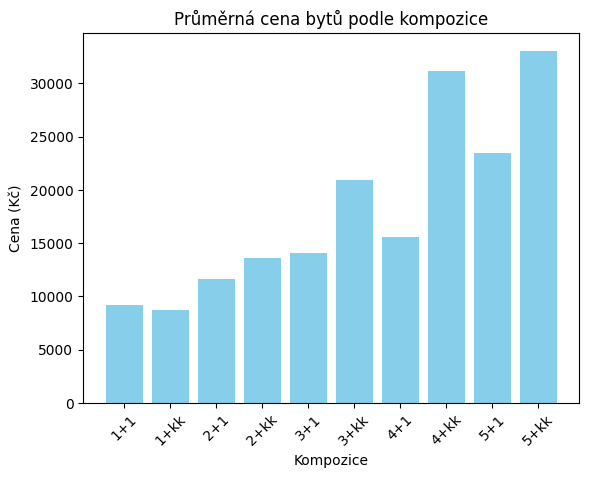

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

def nacti_data(soubor):
    data = pd.read_csv(soubor)
    data['Velikost'] = data['Kompozice'].str.extract(r'(\d+)\s?m²')[0].astype(float)
    data['Kompozice'] = data['Kompozice'].str.extract(r'bytu\s([\d\+kk]+)')[0]
    data['Cena'] = pd.to_numeric(data['Cena'].str.replace(r'[^\d]', '', regex=True), errors='coerce')
    return data.dropna(subset=['Kompozice', 'Cena'])

def vypocet_agregace(data):
    return data.groupby('Kompozice').agg(
        Průměrná_cena=('Cena', 'mean'),
        Průměrná_velikost=('Velikost', 'mean')
    ).round(2).reset_index()

def nejdrazsi_lokality(data):
    return data.groupby('Lokalita')['Cena'].mean().nlargest(5).round(2).reset_index()

def hlavni(soubor):
    data = nacti_data(soubor)
    print(f"Průměrná cena bytů: {data['Cena'].mean():.2f} Kč")
    print(f"Nejčastěji inzerovaná dispozice: {data['Kompozice'].mode()[0]}")
    print(f"Počet bytů s cenou nad 20 000 Kč: {len(data[data['Cena'] > 20000])}")

    ceny = data.groupby('Kompozice').agg(
        Minimální_cena=('Cena', 'min'),
        Maximální_cena=('Cena', 'max')
    ).reset_index()
    print("\nMinimální a maximální ceny podle kompozice:")
    print(ceny)

    lokality = nejdrazsi_lokality(data)
    print("\nNejdražší lokality:")
    print(lokality)

    agregace = vypocet_agregace(data)
    agregace['Průměrná_velikost'] = agregace['Průměrná_velikost'].astype(str) + ' m²'
    print("\nPrůměrná velikost bytů (m²) podle kompozice (bez zkratek):")
    print(agregace[['Kompozice', 'Průměrná_cena', 'Průměrná_velikost']])

    plt.bar(agregace['Kompozice'], agregace['Průměrná_cena'], color='skyblue')
    plt.title('Průměrná cena bytů podle kompozice')
    plt.xlabel('Kompozice')
    plt.ylabel('Cena (Kč)')
    plt.xticks(rotation=45)
    plt.show()

if __name__ == "__main__":
    hlavni("C:/reality/byty_ostrava_pronajem_opraveno.csv")
